In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import plotly.express as px

init_notebook_mode(connected=True)

In [45]:
df = pd.read_csv("Oscar_winning_movies.csv")

In [46]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Columns: 119 entries, year to release_date.day-of-week
dtypes: float64(10), int64(46), object(63)
memory usage: 1.1+ MB


(1235, 119)

In [47]:
df[df.columns[:119]]

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,...,0,NaN,0,NaN,0,NaN,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,tt0120630,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,...,1,Best Animated Film,1,Best Animation,1,Best Animation,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,tt0120667,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,...,0,NaN,0,NaN,0,NaN,2005.0,7.0,8.0,5.0
3,2002,Frida,tt0120679,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,...,0,NaN,0,NaN,0,NaN,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,tt0120737,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,A meek Hobbit from the Shire and eight compani...,1286275,...,0,NaN,1,Best Music,2,Best Music|Best Production Design,2001.0,12.0,19.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2018,Shoplifters,tt8075192,R,121,Crime|Drama,8.1,93.0,A family of small-time crooks take in a child ...,11471,...,0,NaN,1,Best Foreign Film,1,Best Foreign Film,NaN,NaN,NaN,NaN
1231,2018,Bao,tt8075496,G,8,Animation|Short|Family,7.5,NaN,A Chinese-Canadian woman suffering from empty ...,14730,...,0,NaN,0,NaN,0,NaN,2018.0,6.0,15.0,5.0
1232,2018,Capernaum,tt8267604,R,126,Drama,8.1,74.0,While serving a five-year sentence for a viole...,2964,...,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1233,2018,Animal Behaviour,tt8615478,NaN,14,Animation|Short|Comedy,6.4,NaN,Animated anthropomorphized characters in a the...,195,...,0,NaN,0,NaN,0,NaN,2018.0,6.0,11.0,1.0


In [48]:
num_columns = df.shape[1]

column_names = df.columns.tolist()
for name in column_names:
    print(name)

#Выводим все поля что имеет наш датасет для понимая, что делать дальше

year
movie
movie_id
certificate
duration
genre
rate
metascore
synopsis
votes
gross
release_date
user_reviews
critic_reviews
popularity
awards_wins
awards_nominations
Oscar_Best_Picture_won
Oscar_Best_Picture_nominated
Oscar_Best_Director_won
Oscar_Best_Director_nominated
Oscar_Best_Actor_won
Oscar_Best_Actor_nominated
Oscar_Best_Actress_won
Oscar_Best_Actress_nominated
Oscar_Best_Supporting_Actor_won
Oscar_Best_Supporting_Actor_nominated
Oscar_Best_Supporting_Actress_won
Oscar_Best_Supporting_Actress_nominated
Oscar_Best_AdaScreen_won
Oscar_Best_AdaScreen_nominated
Oscar_Best_OriScreen_won
Oscar_Best_OriScreen_nominated
Oscar_nominated
Oscar_nominated_categories
Golden_Globes_won
Golden_Globes_won_categories
Golden_Globes_nominated
Golden_Globes_nominated_categories
BAFTA_won
BAFTA_won_categories
BAFTA_nominated
BAFTA_nominated_categories
Screen_Actors_Guild_won
Screen_Actors_Guild_won_categories
Screen_Actors_Guild_nominated
Screen_Actors_Guild_nominated_categories
Critics_Choice_won


In [49]:
df = df.fillna(0)
df.head(15)

#Убираем, точнее заменяем все NaN на нули, в дальнейшем это учитывается

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,...,0,0,0,0,0,0,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,tt0120630,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,...,1,Best Animated Film,1,Best Animation,1,Best Animation,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,tt0120667,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,...,0,0,0,0,0,0,2005.0,7.0,8.0,5.0
3,2002,Frida,tt0120679,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,...,0,0,0,0,0,0,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,tt0120737,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,A meek Hobbit from the Shire and eight compani...,1286275,...,0,0,1,Best Music,2,Best Music|Best Production Design,2001.0,12.0,19.0,3.0
5,2000,Mission: Impossible II,tt0120755,PG-13,123,Action|Adventure|Thriller,6.1,59.0,"A secret agent is sent to Sydney, to find and ...",249988,...,0,0,0,0,0,0,2000.0,5.0,24.0,3.0
6,2002,Resident Evil,tt0120804,R,100,Action|Horror|Sci-Fi,6.7,33.0,"A special military unit fights a powerful, out...",204545,...,0,0,0,0,0,0,2002.0,3.0,15.0,5.0
7,2000,X-Men,tt0120903,PG-13,104,Action|Adventure|Sci-Fi,7.4,64.0,Two mutants come to a private academy for thei...,468351,...,0,0,0,0,0,0,2000.0,7.0,14.0,5.0
8,2000,The Emperor's New Groove,tt0120917,G,78,Animation|Adventure|Comedy,7.3,70.0,Emperor Kuzco is turned into a llama by his ex...,133781,...,0,0,0,0,0,0,2000.0,12.0,15.0,5.0
9,2005,Corpse Bride,tt0121164,PG,77,Animation|Drama|Family,7.4,83.0,When a shy groom practices his wedding vows in...,197604,...,1,Best Animated Film,0,0,0,0,2005.0,9.0,23.0,5.0


In [50]:
df_work = df.drop(['movie_id', 'gross', 'Golden_Globes_won_categories', 'Golden_Globes_nominated_categories', 'BAFTA_won_categories', 'BAFTA_nominated_categories', 'Screen_Actors_Guild_won_categories', 'Screen_Actors_Guild_nominated_categories', 'Critics_Choice_won_categories', 'Critics_Choice_nominated_categories', 'Directors_Guild_nominated_categories', 'Producers_Guild_won_categories', 'Producers_Guild_nominated_categories', 'Art_Directors_Guild_nominated_categories', 'Writers_Guild_nominated_categories', 'Costume_Designers_Guild_nominated_categories', 'Online_Film_Television_Association_won_categories', 'Online_Film_Television_Association_nominated_categories', 'Online_Film_Critics_Society_won_categories', 'Online_Film_Critics_Society_nominated_categories', 'People_Choice_won_categories', 'People_Choice_nominated_categories', 'London_Critics_Circle_Film_nominated_categories', 'American_Cinema_Editors_nominated_categories', 'Austin_Film_Critics_Association_nominated_categories', 'Denver_Film_Critics_Society_nominated_categories', 'Boston_Society_of_Film_Critics_won_categories', 'Boston_Society_of_Film_Critics_nominated_categories', 'New_York_Film_Critics_Circle_won_categories', 'New_York_Film_Critics_Circle_nominated_categories', 'Los_Angeles_Film_Critics_Association_won_categories', 'Los_Angeles_Film_Critics_Association_nominated_categories'], axis=1)
df_work.head()

#Создаем другую переменную, но без некоторых стринговых пполей, чтобы не морочиться в дальнейшем

,year,movie,certificate,duration,genre,rate,metascore,synopsis,votes,release_date,...,Boston_Society_of_Film_Critics_won,Boston_Society_of_Film_Critics_nominated,New_York_Film_Critics_Circle_won,New_York_Film_Critics_Circle_nominated,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_nominated,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,2001-12-25,...,0,0,0,0,0,0,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,2000-06-23,...,0,0,1,1,1,1,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,2005-07-08,...,0,0,0,0,0,0,2005.0,7.0,8.0,5.0
3,2002,Frida,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,2002-11-22,...,0,0,0,0,0,0,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,A meek Hobbit from the Shire and eight compani...,1286275,2001-12-19,...,0,1,0,0,1,2,2001.0,12.0,19.0,3.0


In [51]:
df_work = df_work.replace({'No': 0, 'Yes': 1})
#Идет замена 

C:\Users\2024\AppData\Local\Temp\ipykernel_21008\1321305985.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [52]:
num_columns = df_work.shape[1]

column_names = df_work.columns.tolist()
for name in column_names:
    print(name)

#печатаем уже новые поля после удаления

year
movie
certificate
duration
genre
rate
metascore
synopsis
votes
release_date
user_reviews
critic_reviews
popularity
awards_wins
awards_nominations
Oscar_Best_Picture_won
Oscar_Best_Picture_nominated
Oscar_Best_Director_won
Oscar_Best_Director_nominated
Oscar_Best_Actor_won
Oscar_Best_Actor_nominated
Oscar_Best_Actress_won
Oscar_Best_Actress_nominated
Oscar_Best_Supporting_Actor_won
Oscar_Best_Supporting_Actor_nominated
Oscar_Best_Supporting_Actress_won
Oscar_Best_Supporting_Actress_nominated
Oscar_Best_AdaScreen_won
Oscar_Best_AdaScreen_nominated
Oscar_Best_OriScreen_won
Oscar_Best_OriScreen_nominated
Oscar_nominated
Oscar_nominated_categories
Golden_Globes_won
Golden_Globes_nominated
BAFTA_won
BAFTA_nominated
Screen_Actors_Guild_won
Screen_Actors_Guild_nominated
Critics_Choice_won
Critics_Choice_nominated
Directors_Guild_won
Directors_Guild_won_categories
Directors_Guild_nominated
Producers_Guild_won
Producers_Guild_nominated
Art_Directors_Guild_won
Art_Directors_Guild_won_categor

In [53]:
year_df = df_work[[x for x in df_work.columns if 'rate' in x] + ['year']]
sum_year = year_df.groupby('year').sum()

fig = go.Figure(data=[go.Bar(name=column, x=sum_year.index, y=sum_year[column]) for column in sum_year.columns])

fig.update_layout(title='Сумма оценок по годам', xaxis_title='Год', yaxis_title='Сумма оценок')
#Выводим сумму оценок по годом. Это наталкивает нас на какие-то предположения, например в 2017 году было много фильмов с плохой оценкой или же в 
#принципе было мало фильмов, не только плозих. Пока рано о чем-то судить

In [54]:
year_df = df_work[[x for x in df_work.columns if 'rate' in x] + ['year']]
sum_year = year_df.groupby('year').mean()

fig = go.Figure(data=[go.Bar(name=column, x=sum_year.index, y=sum_year[column]) for column in sum_year.columns])

fig.update_layout(title='Сумма оценок по годам', xaxis_title='Год', yaxis_title='Сумма оценок')
#Из среднего значения оценок видим что самая высокая оценка у 2017 года, это может натолкнуть на то что в 2017 году было мало фильмов но свысокой оценкой

In [55]:
year_df = df_work[[x for x in df_work.columns if 'metascore' in x] + ['year']]
sum_year = year_df.groupby('year').sum()

fig = go.Figure(data=[go.Bar(name=column, x=sum_year.index, y=sum_year[column]) for column in sum_year.columns])

fig.update_layout(title='Сумма оценок по годам', xaxis_title='Год', yaxis_title='Сумма оценок')
#Повторяем все тоже самое для метооценок и видим, что данные практически одинаковые

In [56]:
year_df = df_work[[x for x in df_work.columns if 'metascore' in x] + ['year']]
sum_year = year_df.groupby('year').mean()

fig = go.Figure(data=[go.Bar(name=column, x=sum_year.index, y=sum_year[column]) for column in sum_year.columns])

fig.update_layout(title='Сумма оценок по годам', xaxis_title='Год', yaxis_title='Сумма оценок')

<Axes: xlabel='rate', ylabel='year'>

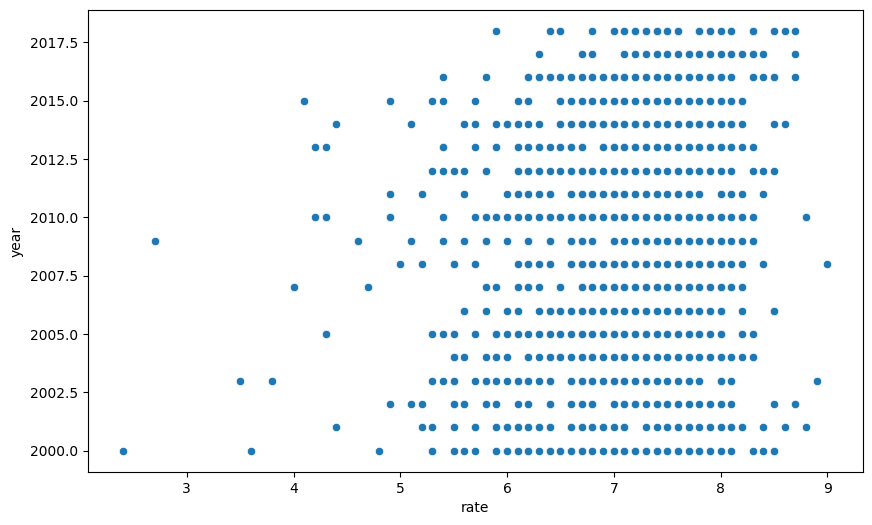

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_work, x='rate', y='year')
#Как тут видно, действительно, в 2017 году больше фильмов с высокой оценкой, но меньшим кол-вом


In [58]:
df_work['rate'].mean()

7.06639676680162

In [59]:
rate_df1 = df_work[[x for x in df_work.columns if 'rate' in x] + ['metascore']]
metascore_df1 = rate_df1.groupby('rate').mean()

fig = go.Figure(data=[
    go.Scatter(x=metascore_df1.index, y=metascore_df1[column], mode='markers+lines', name=column) 
    for column in metascore_df1.columns
])

fig.update_layout(title='Средние значения метаоценки от оценки',
                   xaxis_title='Оценка',
                   yaxis_title='Метаоценка')

#как видно из данного графика: впринципе эти оценки мало разнятся между собой, соответсвенно фильмы которые оценили высокими балами и те и 
#другие с большей вероятностью могут получить те или иные награды, включая оскор

In [60]:
metascore_df = df_work[[x for x in df_work.columns if 'metascore' in x] + ['duration']]
metascore = metascore_df.groupby('metascore').mean()

fig = go.Figure(data=[
    go.Scatter(x=metascore.index, y=metascore[column], mode='markers+lines', name=column) 
    for column in metascore.columns
])

fig.update_layout(title='Среднее значение продолжительности фильмов от метаоценки',
                   xaxis_title='Метоценка',
                   yaxis_title='Продолжительность фильмов')

#Какой-то явной зависимости тут не прослеживается, значит продолжительность фильмов не влияет на оценку

In [61]:
years_df = df_work.groupby('year')[['votes']].sum()

years_df.columns = ['votes']

trace0 = go.Scatter(
    x = years_df.index,
    y = years_df['votes'],
)

data = [trace0]
layuot = {'title': 'Количество голосов по годам'}

fig = go.Figure(data = data, layout = layuot)
iplot(fig, show_link = False)
#Как мы можем видеть кол-во голосов с годами уменьшается, соответственно на премию оскар влияет еще что-то другое

C:\Users\2024\AppData\Local\Temp\ipykernel_21008\4022446214.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='popularity', ylabel='Density'>

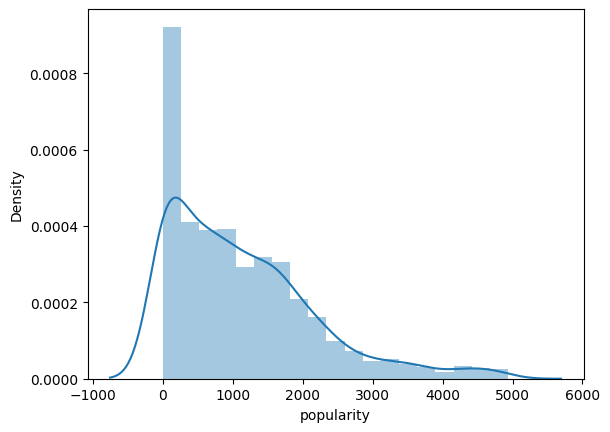

In [62]:
sns.distplot(df['popularity'])
#Из данной гистограммы видно, что больше всего фильмов находятся в пределах популярности до 2000

In [63]:
nomination_df = df_work[[x for x in df_work.columns if 'awards_nominations' in x] + ['awards_wins']]
sum_nomination = nomination_df.groupby('awards_wins').mean()

fig = go.Figure(data=[go.Bar(name=column, x=sum_nomination.index, y=sum_nomination[column]) for column in sum_nomination.columns])

fig.update_layout(title='Зависимость номинации на различные награды и сколько было полученно', xaxis_title='Полученная награда', yaxis_title='Номинация')
#Зависимость наград от номинаций не только оскора. Как видно кол-во номинаций напрямую коллерирует с их получением, отсюда 
#следует, что чем больше номинаций, то есть вероятность, что от 30 до 40 % этих наград получит картина  

In [64]:
selected_columns = ['Oscar_Best_Picture_nominated', 'Oscar_Best_Director_nominated', 'Oscar_Best_Actor_nominated', 'Oscar_Best_Actress_nominated', 'Oscar_Best_Supporting_Actor_nominated', 'Oscar_Best_AdaScreen_nominated', 'Oscar_Best_OriScreen_nominated']
sum_nomination = df_work[selected_columns].sum()

fig = go.Figure(data=[go.Bar(x=sum_nomination.index, y=sum_nomination.values)])

fig.update_layout(title='Сумма номинаций по различным категориям',
                   xaxis_title='Категории',
                   yaxis_title='Сумма номинаций',
                   xaxis_tickangle=-45,  
                   width=800, height=600)  

#Как мы уже увидели на предыдущем графике, есть прямая зависимость от количества номинаций и кол-ва полученных наград, соответственно с оскаром будет так же

In [65]:
won_columns = [
    'Oscar_Best_Picture_won', 
    'Oscar_Best_Director_won', 
    'Oscar_Best_Actor_won', 
    'Oscar_Best_Actress_won', 
    'Oscar_Best_Supporting_Actor_won', 
    'Oscar_Best_AdaScreen_won', 
    'Oscar_Best_OriScreen_won'
]

df_work['Total_Oscars_Won'] = df_work[won_columns].sum(axis=1)
#Создадим новое поле, где посчитаем именно кол-во выйгранных оскаров у всех фильмов в разных номинациях

In [66]:
sales_df1 = df_work[[x for x in df_work.columns if 'Total_Oscars_Won' in x] + ['Golden_Globes_won']]
mean_sales_by_metascore = sales_df1.groupby('Total_Oscars_Won').mean()

fig = go.Figure(data=[
    go.Scatter(x=mean_sales_by_metascore.index, y=mean_sales_by_metascore[column], mode='markers+lines', name=column) 
    for column in mean_sales_by_metascore.columns
])

fig.update_layout(title='Зависимость оскара от Золоього глобуса',
                   xaxis_title='Оскар',
                   yaxis_title='Золотой Глобус')
#Как мы видим из тех фильмов, которые выйграли золотой глобус и оскар, понятно что соотношения идет практически 1 к 1, как минимум 
#фильм выйгравший один золотой глобус, выйграет один оскар

In [67]:
df_work['BAFTA_nominated']

0        0
1        2
2        0
3        4
4       14
        ..
1230     1
1231     0
1232     1
1233     0
1234     0
Name: BAFTA_nominated, Length: 1235, dtype: int64

In [68]:
px.scatter(df_work, x='BAFTA_won', y='BAFTA_nominated', title='Rates of Movies by Year')
#Смотрим зависимость премии БФФТА, она так же как и золотой глобус, проводиться перед оскаром
#здесь видно кол-во победителей и в сколько номинациях их номиноровали. Видим следующее, чтобы получить больше трех премий одному фильму необходимо выдвигать как минимум в 7 номинациях

In [69]:
rate_df1 = df_work[[x for x in df_work.columns if 'BAFTA_won' in x] + ['BAFTA_nominated']]
metascore_df1 = rate_df1.groupby('BAFTA_won').mean()

fig = go.Figure(data=[
    go.Scatter(x=metascore_df1.index, y=metascore_df1[column], mode='markers+lines', name=column) 
    for column in metascore_df1.columns
])

fig.update_layout(title='Средния оценка БАФТА',
                   xaxis_title='Выйгрыш',
                   yaxis_title='Номинация')
#Как видим из предыдущих предположений - это так и есть. Теперь проследим за оскаром и БАФТА. 

In [70]:
rate_df1 = df_work[[x for x in df_work.columns if 'Total_Oscars_Won' in x] + ['BAFTA_won']]
metascore_df1 = rate_df1.groupby('Total_Oscars_Won').mean()

fig = go.Figure(data=[
    go.Scatter(x=metascore_df1.index, y=metascore_df1[column], mode='markers+lines', name=column) 
    for column in metascore_df1.columns
])

fig.update_layout(title='Средния оценка БАФТА',
                   xaxis_title='Выйгрыш',
                   yaxis_title='Номинация')
#Как видно, в серднем тут так же как и с золотым глобусом, чем больше у филььма БАФТА, тем больше шанс получить оскар

In [71]:
rate_df1 = df_work[[x for x in df_work.columns if 'Total_Oscars_Won' in x] + ['Critics_Choice_won']]
metascore_df1 = rate_df1.groupby('Total_Oscars_Won').mean()

fig = go.Figure(data=[
    go.Scatter(x=metascore_df1.index, y=metascore_df1[column], mode='markers+lines', name=column) 
    for column in metascore_df1.columns
])

fig.update_layout(title='Средния оценка БАФТА',
                   xaxis_title='Выйгрыш',
                   yaxis_title='Номинация')

In [72]:
cols = [
    'Total_Oscars_Won', 'Golden_Globes_won', 'BAFTA_won'
]

fig = px.scatter_matrix(df_work, dimensions=cols)
fig.update_layout(title='Парные графики', width=1000, height=1000)
#Я рассмотрел в чакстности как провожу исследования по некоторым пунктам, теперь разобьем их на несколько групп и покажем их зависимости 

In [75]:
won_columns = ['Golden_Globes_won', 'BAFTA_won']
df_work['Total_Groupe_One'] = df_work[won_columns].sum(axis=1)

rate_df1 = df_work[[x for x in df_work.columns if 'Total_Oscars_Won' in x] + ['Total_Groupe_One']]
metascore_df1 = rate_df1.groupby('Total_Oscars_Won').mean()

fig = go.Figure(data=[
    go.Scatter(x=metascore_df1.index, y=metascore_df1[column], mode='markers+lines', name=column) 
    for column in metascore_df1.columns
])

fig.update_layout(title='Средния оценка Группы 1',
                   xaxis_title='Оскар',
                   yaxis_title='Награды группы 1')

In [ ]:
cols = [
    'Total_Oscars_Won', 'Screen_Actors_Guild_won', 
    'Critics_Choice_won', 'Directors_Guild_won', 'Producers_Guild_won', 
    'Art_Directors_Guild_won', 'Writers_Guild_won', 'Costume_Designers_Guild_won'
]

fig = px.scatter_matrix(df_work, dimensions=cols)
fig.update_layout(title='Парные графики', width=2000, height=2000)


In [76]:
won_columns = ['Screen_Actors_Guild_won', 
              'Critics_Choice_won', 'Directors_Guild_won', 'Producers_Guild_won', 
              'Art_Directors_Guild_won', 'Writers_Guild_won', 'Costume_Designers_Guild_won'
              ]
df_work['Total_Groupe_Two'] = df_work[won_columns].sum(axis=1)

rate_df1 = df_work[[x for x in df_work.columns if 'Total_Oscars_Won' in x] + ['Total_Groupe_Two']]
metascore_df1 = rate_df1.groupby('Total_Oscars_Won').mean()

fig = go.Figure(data=[
    go.Scatter(x=metascore_df1.index, y=metascore_df1[column], mode='markers+lines', name=column) 
    for column in metascore_df1.columns
])

fig.update_layout(title='Средния оценка Группы 2',
                   xaxis_title='Оскар',
                   yaxis_title='Награды группы 2')

In [ ]:
cols = [
    'Total_Oscars_Won', 'Online_Film_Television_Association_won', 
    'Online_Film_Critics_Society_won', 'People_Choice_won'
]

fig = px.scatter_matrix(df_work, dimensions=cols)
fig.update_layout(title='Парные графики', width=1000, height=1000)

In [78]:
won_columns = ['Online_Film_Television_Association_won', 
               'Online_Film_Critics_Society_won', 'People_Choice_won'
              ]
df_work['Total_Groupe_Three'] = df_work[won_columns].sum(axis=1)

rate_df1 = df_work[[x for x in df_work.columns if 'Total_Oscars_Won' in x] + ['Total_Groupe_Three']]
metascore_df1 = rate_df1.groupby('Total_Oscars_Won').mean()

fig = go.Figure(data=[
    go.Scatter(x=metascore_df1.index, y=metascore_df1[column], mode='markers+lines', name=column) 
    for column in metascore_df1.columns
])

fig.update_layout(title='Средния оценка Группы 3',
                   xaxis_title='Оскар',
                   yaxis_title='Награды группы 3')

In [ ]:
cols = [
    'Total_Oscars_Won','London_Critics_Circle_Film_won', 'American_Cinema_Editors_won', 
    'Hollywood_Film_won', 'Austin_Film_Critics_Association_won', 'Denver_Film_Critics_Society_won',
    'Boston_Society_of_Film_Critics_won', 'New_York_Film_Critics_Circle_won', 
    'Los_Angeles_Film_Critics_Association_won'
]

fig = px.scatter_matrix(df_work, dimensions=cols)
fig.update_layout(title='Парные графики', width=2000, height=2000)

In [79]:
won_columns = [
    'London_Critics_Circle_Film_won', 'American_Cinema_Editors_won', 
    'Hollywood_Film_won', 'Austin_Film_Critics_Association_won', 'Denver_Film_Critics_Society_won',
    'Boston_Society_of_Film_Critics_won', 'New_York_Film_Critics_Circle_won', 
    'Los_Angeles_Film_Critics_Association_won'
              ]
df_work['Total_Groupe_Four'] = df_work[won_columns].sum(axis=1)

rate_df1 = df_work[[x for x in df_work.columns if 'Total_Oscars_Won' in x] + ['Total_Groupe_Four']]
metascore_df1 = rate_df1.groupby('Total_Oscars_Won').mean()

fig = go.Figure(data=[
    go.Scatter(x=metascore_df1.index, y=metascore_df1[column], mode='markers+lines', name=column) 
    for column in metascore_df1.columns
])

fig.update_layout(title='Средния оценка Группы 4',
                   xaxis_title='Оскар',
                   yaxis_title='Награды группы 4')

C:\Users\2024\AppData\Local\Temp\ipykernel_21008\2656735139.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\2024\AppData\Local\Temp\ipykernel_21008\2656735139.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



<Axes: xlabel='rate', ylabel='awards_nominations'>

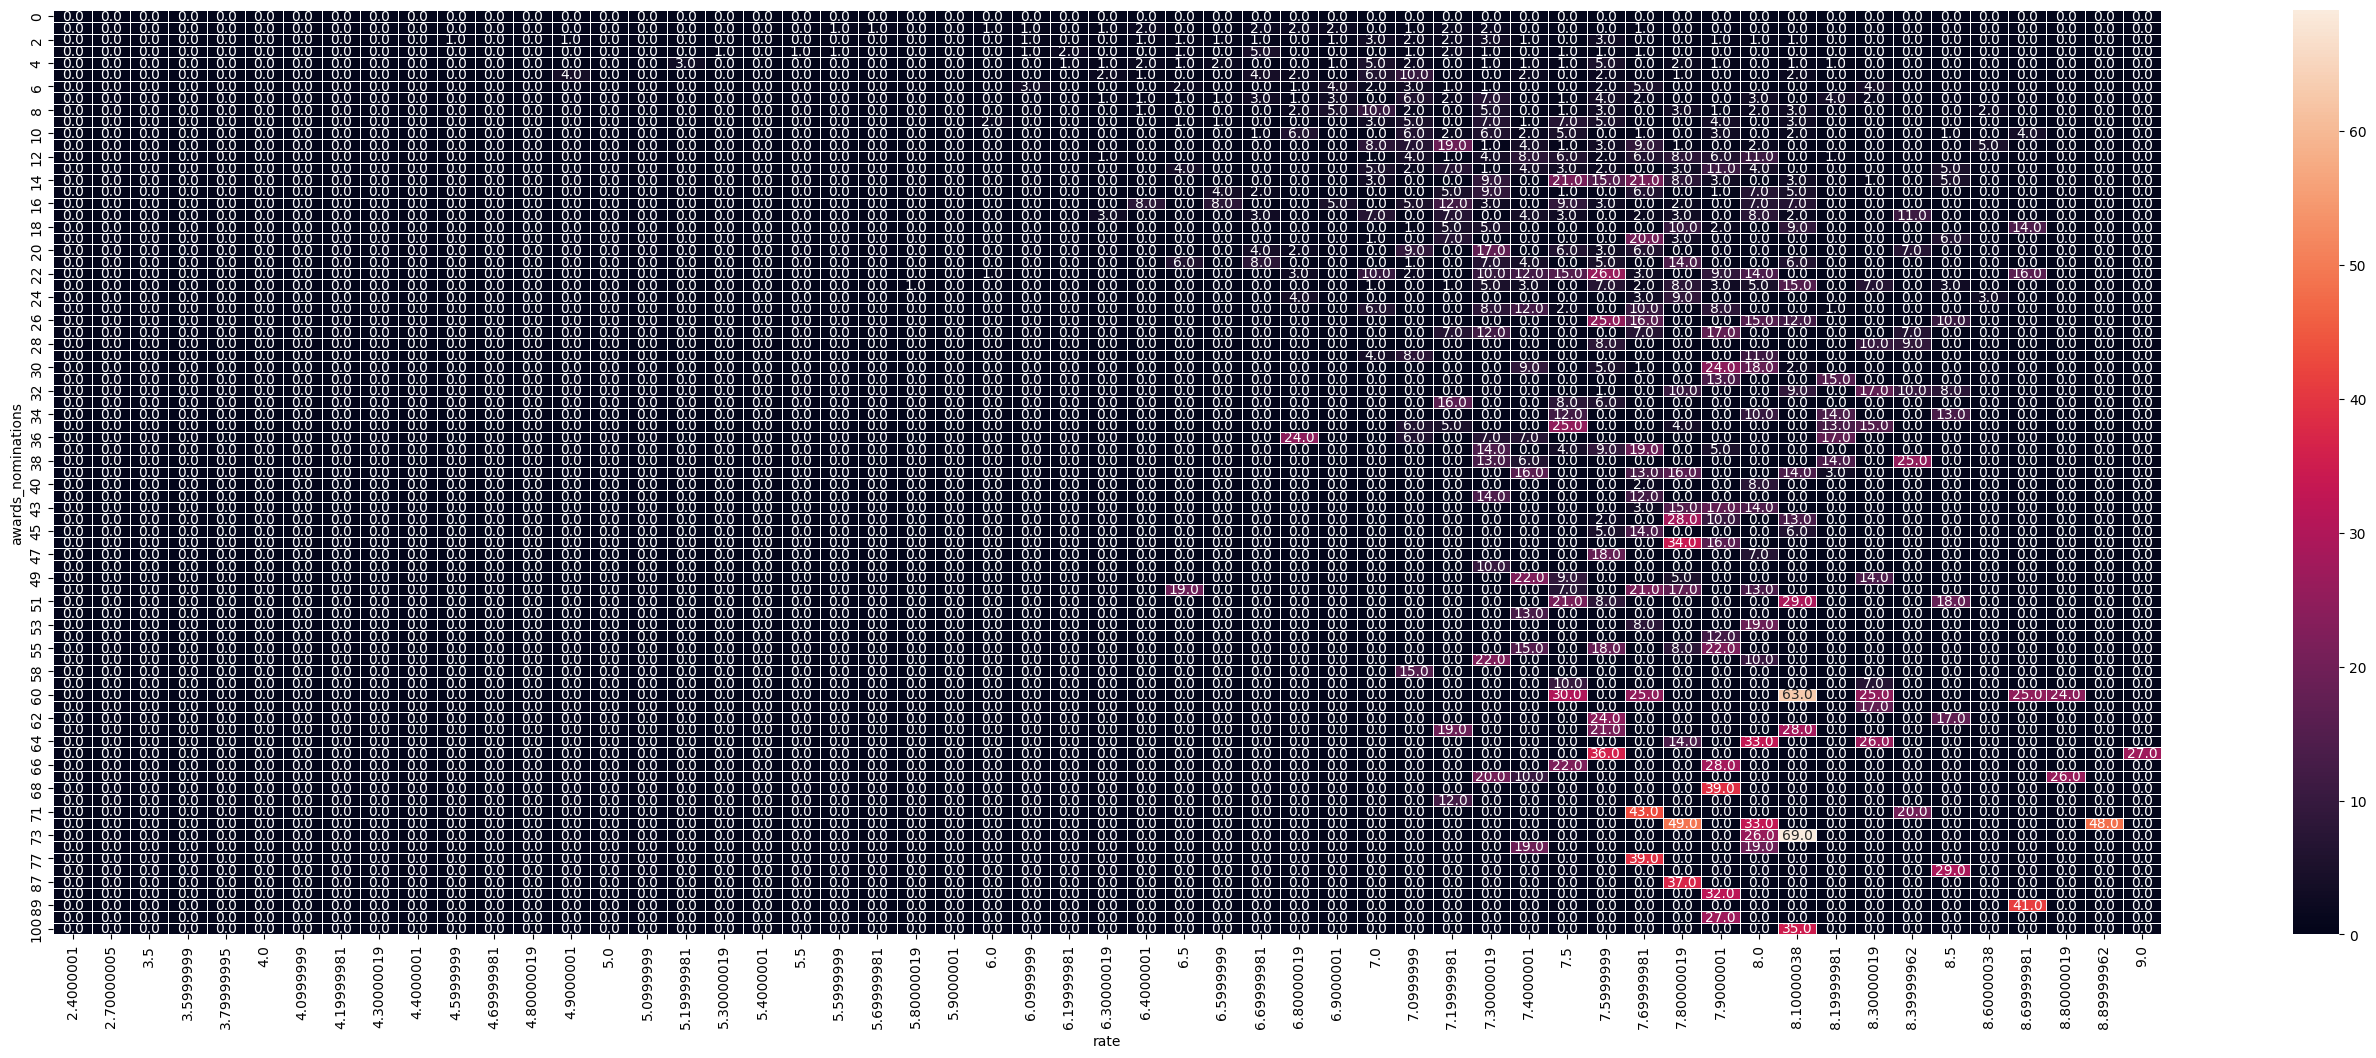

In [ ]:
platform_genre_sales = df_work.pivot_table(
    index='awards_nominations',
    columns='rate',
    values='awards_wins',
    aggfunc=sum).fillna(0).applymap(int)

plt.figure(figsize=(34, 12)) 
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.54)
